In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import netCDF4 as nc
import datetime as dt
import cmocean
import sys
sys.path.append('/ocean/eolson/MEOPAR/analysis-elise-old/notebooks/databases/')
#import dataProcess as dpro
#sys.path.append('/ocean/eolson/MEOPAR/analysis-elise/notebooks/PARModel/doc/')
#import commonFuns as cf
from salishsea_tools import loadDataFRP as cf
import matplotlib
from salishsea_tools.geo_tools import find_closest_model_point
from salishsea_tools.viz_tools import set_aspect
import f90nml

%matplotlib inline

matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'legend.numpoints': 1})

In [2]:
prefix='TRACE3_AT0_01'
prefixS='TRACE3_AT0_1'
fileLoc='GrahamRuns/results'

In [3]:
rundir1='/data/eolson/MEOPAR/SS36runs/'+fileLoc+'/'+prefix
rundirS='/data/eolson/MEOPAR/SS36runs/'+fileLoc+'/'+prefixS
f1=nc.Dataset(os.path.join(rundir1,'SalishSea_1h_20170322_20170410_ptrc_T_20170406-20170410.nc'))
f1s=nc.Dataset(os.path.join(rundirS,'SalishSea_1h_20170322_20170410_grid_T_20170406-20170410.nc'))
nml=f90nml.read(os.path.join(rundir1,'namelist_trace3_cfg'))

In [4]:
nml['nampisriv'].keys()

odict_keys(['wd', 'alpha_c', 'alpha_t'])

In [5]:
fm=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask=np.copy(fm.variables['tmask'])
e3t=np.copy(fm.variables['e3t_0'])
fm.close()

In [6]:
df0, zCasts=cf.loadDataFRP(exp='exp1',sel='wide')

In [7]:
df0

,Station,Date,Date_UTC,Time_UTC_hhmmss,Time_UTC_DecDay,LatDecDeg,LonDecDeg,LatDecDeg_surface,LonDecDeg_surface,LatDecDeg_bottom,...,BottleLetter,ALS_Turb_NTU,ALS_TSS_mgL,sb19Turb_uncorrected,Sal,ishift_sub19,pStart25,pEnd25,pS_pr,pE_pr
0,1.0,20170410,20170410,17:54:17,0.746030,49.148333,-123.040000,NaN,NaN,NaN,...,NaN,NaN,NaN,693.827500,0.374367,-2.0,769.0,1103.0,452.0,1477.0
1,2.0,20170410,20170410,18:05:11,0.753600,49.148333,-123.040000,NaN,NaN,NaN,...,A,25.40,32.5,712.901615,0.268103,2.0,740.0,1060.0,730.0,1708.0
2,3.0,20170410,20170410,19:44:22,0.822477,49.099983,-123.526600,NaN,NaN,NaN,...,B,2.40,8.9,53.135185,25.965052,9.0,599.0,1939.0,582.0,2365.0
3,4.0,20170410,20170410,20:25:40,0.851157,49.100383,-123.467017,NaN,NaN,NaN,...,C,2.54,12.2,63.973250,25.503570,3.0,683.0,1832.0,672.0,2320.0
4,5.0,20170410,20170410,21:05:12,0.878611,49.100583,-123.400417,NaN,NaN,NaN,...,D,8.28,18.9,231.201766,17.205491,5.0,598.0,1820.0,582.0,2761.0
5,6.0,20170410,20170410,21:40:15,0.902951,49.100500,-123.375500,NaN,NaN,NaN,...,NaN,NaN,NaN,239.153667,16.638400,5.0,581.0,1764.0,569.0,1782.0
6,7.0,20170410,20170410,21:58:48,0.915833,49.100000,-123.350000,NaN,NaN,49.112500,...,E,8.60,15.7,188.149816,18.111884,9.0,590.0,1785.0,567.0,2389.0
7,8.0,20170410,20170410,22:30:56,0.938148,49.100333,-123.324667,NaN,NaN,49.103833,...,NaN,NaN,NaN,127.446000,23.296125,9.0,1120.0,2250.0,1108.0,2269.0
8,9.0,20170410,20170410,22:45:20,0.948148,49.101500,-123.309000,NaN,NaN,49.102833,...,F,9.36,21.8,263.411919,12.390206,9.0,635.0,859.0,618.0,1325.0


,Station,Date_UTC,Time_UTC_DecDay,LatDecDeg,LonDecDeg
0,1.0,20170410,0.746030,49.148333,-123.0400
1,2.0,20170410,0.753600,49.148333,-123.0400
2,3.0,20170410,0.822477,49.099983,-123.5266


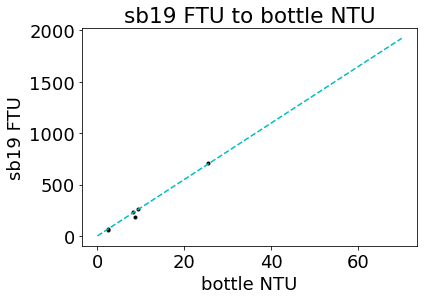

In [8]:
# FTU NTU fit without linear term
x=df0.loc[df0.ALS_Turb_NTU>0]['ALS_Turb_NTU'].values
x=x[:,np.newaxis]
a1=np.linalg.lstsq(x,df0.loc[df0.ALS_Turb_NTU>0]['sb19Turb_uncorrected'],rcond=None)[0]
FTUtoNTU=a1[0]
plt.plot(x,df0.loc[df0.ALS_Turb_NTU>0]['sb19Turb_uncorrected'],'k.')
xx=np.linspace(0,70)
plt.plot(xx,xx*FTUtoNTU,'c--')
plt.title('sb19 FTU to bottle NTU')
plt.xlabel('bottle NTU')
plt.ylabel('sb19 FTU')
df=df0.loc[:,['Station','Date_UTC','Time_UTC_DecDay','LatDecDeg','LonDecDeg']]#
df.head(3)

In [9]:
stas=df0.loc[df0['Date']==20170410]['Station'].values

In [10]:
[i for i in df0.keys()]

['Station',
 'Date',
 'Date_UTC',
 'Time_UTC_hhmmss',
 'Time_UTC_DecDay',
 'LatDecDeg',
 'LonDecDeg',
 'LatDecDeg_surface',
 'LonDecDeg_surface',
 'LatDecDeg_bottom',
 'LonDecDeg_bottom',
 'LatDecDeg_surf2',
 'LonDecDeg_surf2',
 'LatDecDeg_Niskin',
 'LonDecDeg_Niskin',
 'LatDecDeg_end',
 'LonDecDeg_end',
 'Sounding',
 'MaxWireOut_m',
 'waveHeightEst_m',
 'cloudyPct',
 'filename',
 'time_PDT_hhmmss',
 'time_PDT_decDay',
 'time_on_PDT_hhmmss',
 'time_on_PDT_decDay',
 'time_surface_PDT_hhmmss',
 'time_surface_PDT_decDay',
 'time_bottom_PDT_hhmmss',
 'time_bottom_PDT_decDay',
 'time_surf2_PDT_hhmmss',
 'time_Niskin_PDT_hhmmss',
 'time_off_PDT_hhmmss',
 'SecchiDepth_m',
 'BottleLetter',
 'ALS_Turb_NTU',
 'ALS_TSS_mgL',
 'sb19Turb_uncorrected',
 'Sal',
 'ishift_sub19',
 'pStart25',
 'pEnd25',
 'pS_pr',
 'pE_pr']

In [11]:
def dateTimeToDecDay(dtin):
    tdif=dtin-dt.datetime(1900,1,1)
    dd=tdif.days+tdif.seconds/(3600*24)
    return dd

In [12]:
#ista=stas[0]
#f=f1
def plotProfs(f,ista,fig2,ax2,fs,vthresh):
    # get model indices for time and location:
    dtfUTC=np.array([dateTimeToDecDay(dt.datetime(1900,1,1)+dt.timedelta(seconds=ii)) 
                     for ii in f.variables['time_counter'][:]])
    date=str(df0.loc[df0['Station']==ista]['Date_UTC'].values[0])
    iyr=int(date[0:4])
    imon=int(date[4:6])
    iday=int(date[6:])
    itime=df0.loc[df0['Station']==ista]['Time_UTC_DecDay'].values[0]
    dtObsUTC=dateTimeToDecDay(dt.datetime(iyr,imon,iday)+dt.timedelta(days=itime))
    tt=np.argmin(np.abs(dtfUTC-dtObsUTC))
    print('tt=',tt)
    lat=df0.loc[df0['Station']==ista]['LatDecDeg'].values[0]
    lon=df0.loc[df0['Station']==ista]['LonDecDeg'].values[0]
    jj,ii=find_closest_model_point(lon,lat,f.variables['nav_lon'][:,:],f.variables['nav_lat'][:,:])
    
    # plot
    fig,[ax,ax0]=plt.subplots(2,1,figsize=(8,16))
    ax.invert_yaxis()
    
    iters=(('TUR1','blueviolet'),
           ('TUR2','blue'),
           ('TUR3','aquamarine'),
           ('TUR4','skyblue'),
           ('TUR5','lime'),
           ('TUR6','green'),
           ('TUR7','darkkhaki'),
           ('TUR8','darkgoldenrod'),
           ('TUR9','darkorange'),
           ('TUR10','crimson'))
    p=dict()
    count=0
    for (tvar,col) in iters:
        count+=1
        zplot=np.ma.masked_where(tmask[0,:,jj,ii]==0,f.variables['deptht'][:])
        tplot=np.ma.masked_where(tmask[0,:,jj,ii]==0,f.variables[tvar][tt,:,jj,ii])
        p[count],=ax.plot(tplot,zplot,'-',color=col,
                          label=[x+' {},'.format(nml['nampisriv'][x][count-1]) for x in nml['nampisriv'].keys()])
        splot=np.ma.masked_where(np.logical_or(tmask[0,:,jj,ii]==0,f.variables['deptht'][:]>=vthresh),
                                 fs.variables['vosaline'][tt,:,jj,ii])
        ax2.plot(splot,tplot,'o',color=col,mew=0,alpha=.5)
        ax0.plot(splot,tplot,'o',color=col,mew=0,alpha=.5)
    
    izC=zCasts[ista].dCast
    
    #print([i for i in izC.keys()])
    p[count+1],=ax.plot(izC['turb'],izC['prSM'],'k-',label='Observed')
    #ax2.plot(izC['gsw_srA0'].loc[izC['prSM']<vthresh],izC['turb'].loc[izC['prSM']<vthresh],'kx',
    #         markersize=10,mew=2,alpha=.5)
    ax0.plot(izC['gsw_srA0'].loc[izC['prSM']<vthresh],izC['turb'].loc[izC['prSM']<vthresh],'kx',
             markersize=10,mew=2,alpha=.5)
    izC=zCasts[ista].uCast
    ax.plot(izC['turb'],izC['prSM'],'k-',label='Obs')
    #ax2.plot(izC['gsw_srA0'].loc[izC['prSM']<vthresh],izC['turb'].loc[izC['prSM']<vthresh],'k+',
    #         markersize=10,mew=2,alpha=.5)
    ax0.plot(izC['gsw_srA0'].loc[izC['prSM']<vthresh],izC['turb'].loc[izC['prSM']<vthresh],'k+',
             markersize=10,mew=2,alpha=.5)
    ax.legend(handles=[p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9],p[10],p[11]],
              bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
    ax.set_xlabel('Turbidity (NTU)')
    ax.set_ylabel('Depth')
    ax.set_title('Station '+str(ista)+' Sinking Rate Comparison')
    
    ax2.legend(handles=[p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9],p[10],p[11]], #,p[12],p[13]
              bbox_to_anchor=(1.05, 1.15), loc=2, borderaxespad=0.,fontsize=20)
    
    ax2.set_xlabel('Salinity')
    ax2.set_ylabel('Turbidity (NTU)')
    ax2.set_title('Upper '+str(vthresh)+'m')
    ax0.set_xlabel('Salinity')
    ax0.set_ylabel('Turbidity (NTU)')
    ax0.set_title('Upper '+str(vthresh)+'m')
    #ax0.set_xlim((0,30))
    #ax0.set_ylim((0,25))
    ax.set_ylim((50,0))

In [13]:
#ista=stas[0]
#f=f1
def plotProfs2(f,ista,fig2,ax2,fs,vthresh):
    izC=zCasts[ista].dCast
    ax2.plot(izC['gsw_srA0'].loc[izC['prSM']<vthresh],izC['turb'].loc[izC['prSM']<vthresh],'kx',
             markersize=10,mew=2,alpha=.5)
    izC=zCasts[ista].uCast
    ax2.plot(izC['gsw_srA0'].loc[izC['prSM']<vthresh],izC['turb'].loc[izC['prSM']<vthresh],'k+',
             markersize=10,mew=2,alpha=.25)

In [14]:
#ista=stas[0]
#f=f1
def plotProfsMulti(f,ista,fig2,ax2,fs,vthresh):
    # get model indices for time and location:
    dtfUTC=np.array([dateTimeToDecDay(dt.datetime(1900,1,1)+dt.timedelta(seconds=ii)) for ii in f.variables['time_counter'][:]])
    date=str(df0.loc[df0['Station']==ista]['Date_UTC'].values[0])
    iyr=int(date[0:4])
    imon=int(date[4:6])
    iday=int(date[6:])
    itime=df0.loc[df0['Station']==ista]['Time_UTC_DecDay'].values[0]
    dtObsUTC=dateTimeToDecDay(dt.datetime(iyr,imon,iday)+dt.timedelta(days=itime))
    tt=np.argmin(np.abs(dtfUTC-dtObsUTC))
    lat=df0.loc[df0['Station']==ista]['LatDecDeg'].values[0]
    lon=df0.loc[df0['Station']==ista]['LonDecDeg'].values[0]
    jj,ii=find_closest_model_point(lon,lat,f.variables['nav_lon'][:,:],f.variables['nav_lat'][:,:])

    # plot
    fig,[ax,ax0]=plt.subplots(2,1,figsize=(8,16))
    ax.invert_yaxis()
    
    iters=(('TUR1','blueviolet'),
           ('TUR2','blue'),
           ('TUR3','aquamarine'),
           ('TUR4','skyblue'),
           ('TUR5','lime'),
           ('TUR6','green'),
           ('TUR7','darkkhaki'),
           ('TUR8','darkgoldenrod'),
           ('TUR9','darkorange'),
           ('TUR10','crimson'))
    p=dict()
    count=0
    for (tvar,col) in iters:
        count+=1
        for lj in range(-4,5,2):#(-1,2):
            for li in range(-4,5,2):#(-1,2):
                zplot=np.ma.masked_where(tmask[0,:,jj+lj,ii+li]==0,f.variables['deptht'][:])
                tplot=np.ma.masked_where(np.logical_or(tmask[0,:,jj+lj,ii+li]==0,f.variables[tvar][tt,:,jj+lj,ii+li]>200),
                                         f.variables[tvar][tt,:,jj+lj,ii+li])
                p[count],=ax.plot(tplot,zplot,'-',color=col,
                          label=[x+' {},'.format(nml['nampisriv'][x][count-1]) for x in nml['nampisriv'].keys()])
                splot=np.ma.masked_where(np.logical_or(tmask[0,:,jj+lj,ii+li]==0,f.variables['deptht'][:]>=vthresh),
                                 fs.variables['vosaline'][tt,:,jj+lj,ii+li])
                ax2.plot(splot,tplot,'o',color=col,mew=0,alpha=.5)
                ax0.plot(splot,tplot,'o',color=col,mew=0,alpha=.5)
    
    izC=zCasts[ista].dCast
    p[count+1],=ax.plot(izC['turb'],izC['prSM'],'k-',label='Obs')
    ax0.plot(izC['gsw_srA0'].loc[izC['prSM']<vthresh],izC['turb'].loc[izC['prSM']<vthresh],'kx',
             markersize=10,mew=2,alpha=.5)
    izC=zCasts[ista].uCast
    ax.plot(izC['turb'],izC['prSM'],'k-',label='Obs')
    ax0.plot(izC['gsw_srA0'].loc[izC['prSM']<vthresh],izC['turb'].loc[izC['prSM']<vthresh],'k+',
             markersize=10,mew=2,alpha=.5)
    ax.legend(handles=[p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9],p[10],p[11]],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)#[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,pObs]
    ax.set_xlabel('Turbidity (NTU)')
    ax.set_ylabel('Depth')
    ax.set_title('Station '+str(ista)+' Sinking Rate Comparison')
    
    ax2.set_xlabel('Salinity')
    ax2.set_ylabel('Turbidity (NTU)')
    ax2.set_title('Upper '+str(vthresh)+'m')
    ax0.set_xlabel('Salinity')
    ax0.set_ylabel('Turbidity (NTU)')
    ax0.set_title('Upper '+str(vthresh)+'m')
    #ax0.set_xlim((0,30))
    #ax0.set_ylim((0,25))
    ax.set_ylim((50,0))

In [15]:
test=zCasts[1].dCast['prSM']
for x in test:
    print(x)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0


In [16]:
f1s.variables['deptht'][:]

masked_array(data=[  0.5000003,   1.5000031,   2.5000114,   3.5000305,
                     4.5000706,   5.5001507,   6.5003104,   7.500623 ,
                     8.501236 ,   9.502433 ,  10.5047655,  11.509312 ,
                    12.518167 ,  13.535412 ,  14.568982 ,  15.634288 ,
                    16.761173 ,  18.007135 ,  19.481785 ,  21.389978 ,
                    24.100256 ,  28.229916 ,  34.685757 ,  44.517723 ,
                    58.484333 ,  76.58559  ,  98.06296  , 121.866516 ,
                   147.08946  , 173.11449  , 199.57304  , 226.2603   ,
                   253.06664  , 279.93454  , 306.8342   , 333.75018  ,
                   360.67453  , 387.6032   , 414.5341   , 441.4661   ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

Text(0.5, 1.0, 'Turbidity Error vs Lon')

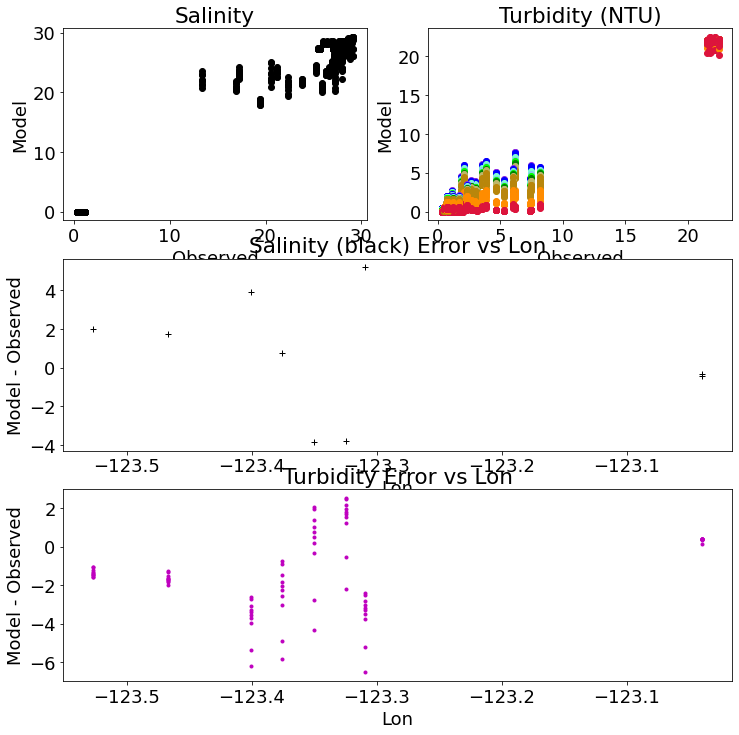

In [17]:
#ista=stas[0]
#f=f1
#def plotTT_SS:
#fig,[ax0,ax1]=plt.subplots(1,2,figsize=(12,6))
fig=plt.figure(figsize=(12,12))
ax0=plt.subplot2grid((3,2),(0,0))
ax1=plt.subplot2grid((3,2),(0,1))
ax3=plt.subplot2grid((3,2),(1,0),colspan=2)
ax4=plt.subplot2grid((3,2),(2,0),colspan=2)
iters=(('TUR1','blueviolet'),
       ('TUR2','blue'),
       ('TUR3','aquamarine'),
       ('TUR4','skyblue'),
       ('TUR5','lime'),
       ('TUR6','green'),
       ('TUR7','darkkhaki'),
       ('TUR8','darkgoldenrod'),
       ('TUR9','darkorange'),
       ('TUR10','crimson'))
vthresh=10
for ista in stas:
# get model indices for time and location:
    dtfUTC=np.array([dateTimeToDecDay(dt.datetime(1900,1,1)+dt.timedelta(seconds=ii)) for ii in f1s.variables['time_counter'][:]])
    date=str(df0.loc[df0['Station']==ista]['Date_UTC'].values[0])
    iyr=int(date[0:4])
    imon=int(date[4:6])
    iday=int(date[6:])
    itime=df0.loc[df0['Station']==ista]['Time_UTC_DecDay'].values[0]
    dtObsUTC=dateTimeToDecDay(dt.datetime(iyr,imon,iday)+dt.timedelta(days=itime))
    tt=np.argmin(np.abs(dtfUTC-dtObsUTC))
    lat=df0.loc[df0['Station']==ista]['LatDecDeg'].values[0]
    lon=df0.loc[df0['Station']==ista]['LonDecDeg'].values[0]
    jj,ii=find_closest_model_point(lon,lat,f1s.variables['nav_lon'][:,:],f1s.variables['nav_lat'][:,:])

    izC=zCasts[ista].uCast
    obsSal=izC['gsw_srA0'].loc[izC['prSM']<vthresh]
    obsT=izC['turb'].loc[izC['prSM']<vthresh]
    obsZ=izC['prSM'].loc[izC['prSM']<vthresh]
    if len(obsZ)==0:
        izC=zCasts[ista].dCast
        obsSal=izC['gsw_srA0'].loc[izC['prSM']<vthresh]
        obsT=izC['turb'].loc[izC['prSM']<vthresh]
        obsZ=izC['prSM'].loc[izC['prSM']<vthresh]
    
    ax3.plot(lon,f1s.variables['vosaline'][tt,1,jj,ii]-np.interp([1.5],obsZ.values,obsSal),'k+')
    
    for lj in range(-1,2):
        for li in range(-1,2):
            iii=tmask[0,:,jj+lj,ii+li]==1
            if np.sum(iii)>0:
                p0=ax0.plot(obsSal,np.interp(obsZ.values,
                        f1s.variables['deptht'][iii],f1s.variables['vosaline'][tt,:,jj+lj,ii+li][iii]),'ko')
                    
    p=dict()
    count=0
    for (tvar,col) in iters:
        count+=1
        ax4.plot(lon,f1.variables[tvar][tt,1,jj,ii]-np.interp([1.5],obsZ.values,obsT),'m.')
        for lj in range(-1,2):
            for li in range(-1,2):
                iii=tmask[0,:,jj+lj,ii+li]==1
                if np.sum(iii)>0:
                    p[count],=ax1.plot(obsT,np.interp(obsZ.values,
                            f1s.variables['deptht'][iii],f1.variables[tvar][tt,:,jj+lj,ii+li][iii]),'o',color=col,
                              label=[x+' {},'.format(nml['nampisriv'][x][count-1]) for x in nml['nampisriv'].keys()])
ax0.set_xlabel('Observed')
ax0.set_ylabel('Model')
ax0.set_title('Salinity')
ax1.set_xlabel('Observed')
ax1.set_title('Turbidity (NTU)')
ax1.set_ylabel('Model')
ax3.set_xlabel('Lon')
ax3.set_ylabel('Model - Observed')
ax3.set_title('Salinity (black) Error vs Lon')
ax4.set_xlabel('Lon')
ax4.set_ylabel('Model - Observed')
ax4.set_title('Turbidity Error vs Lon')

(0.8+0.85*(TANH(c*(S-17.5))+1.0))

april 10 buoy turbidity range: 17.21--26.57

tt= 113
tt= 114
tt= 115
tt= 116
tt= 117
tt= 117
tt= 117
tt= 118
tt= 118


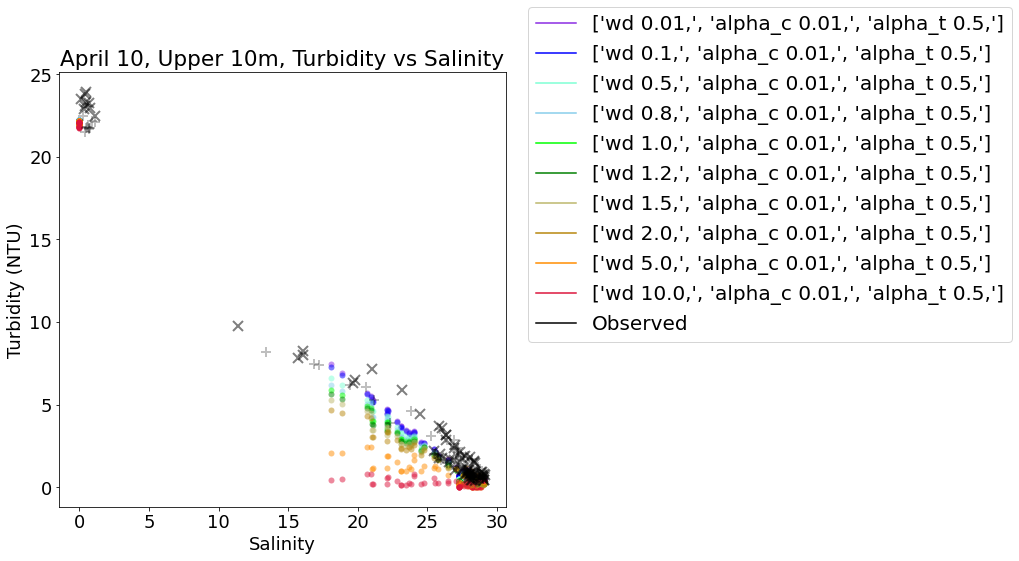

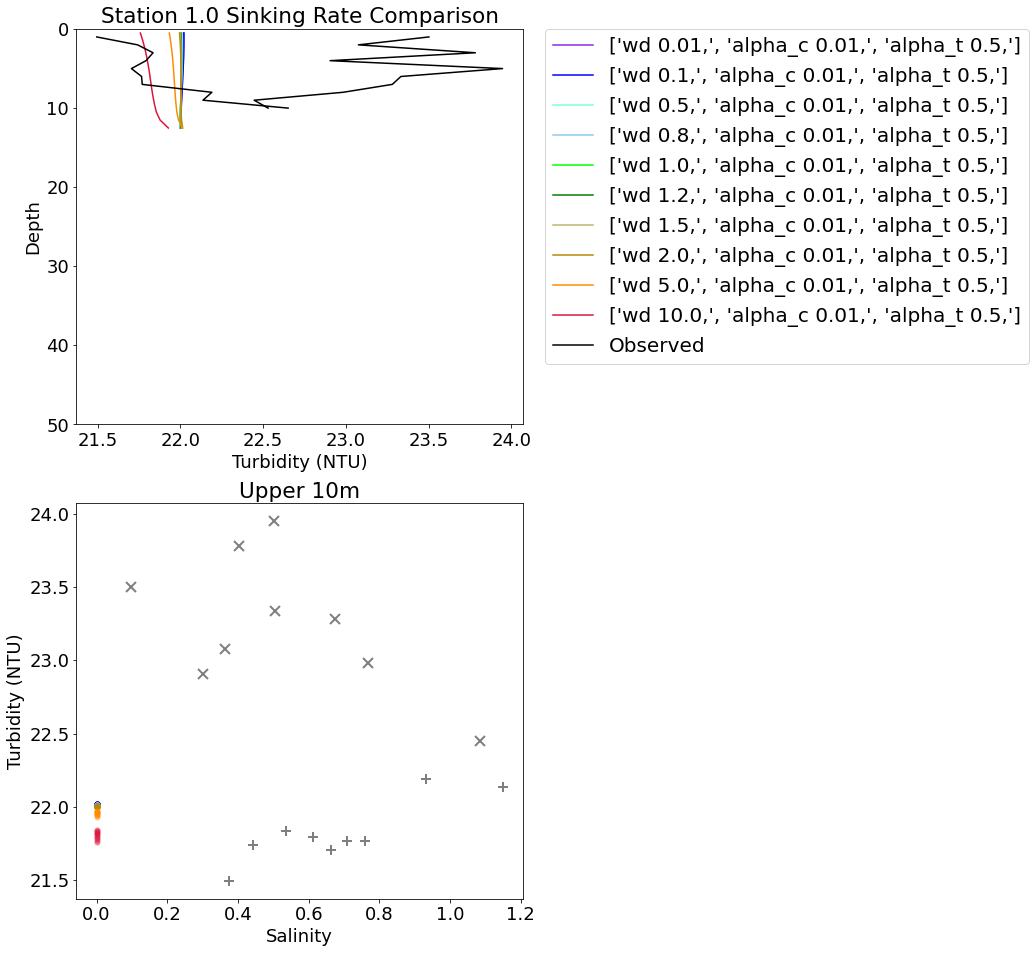

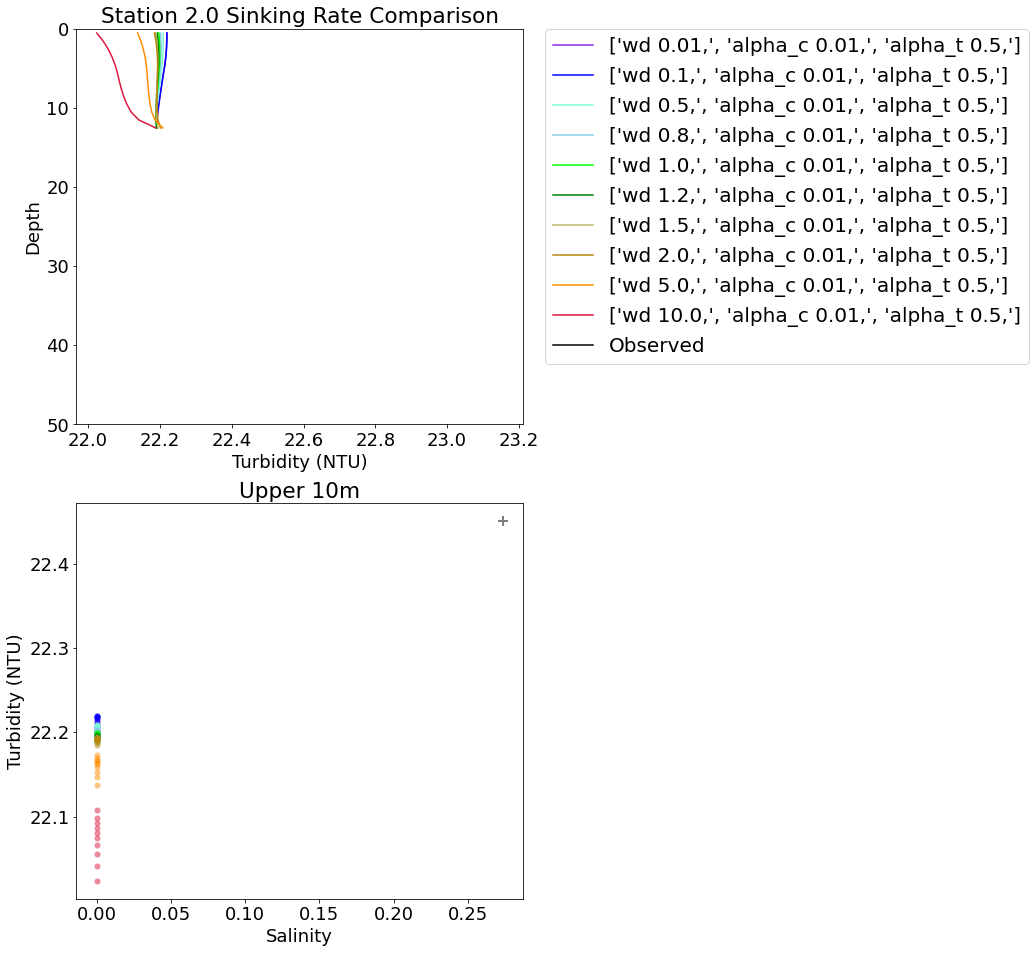

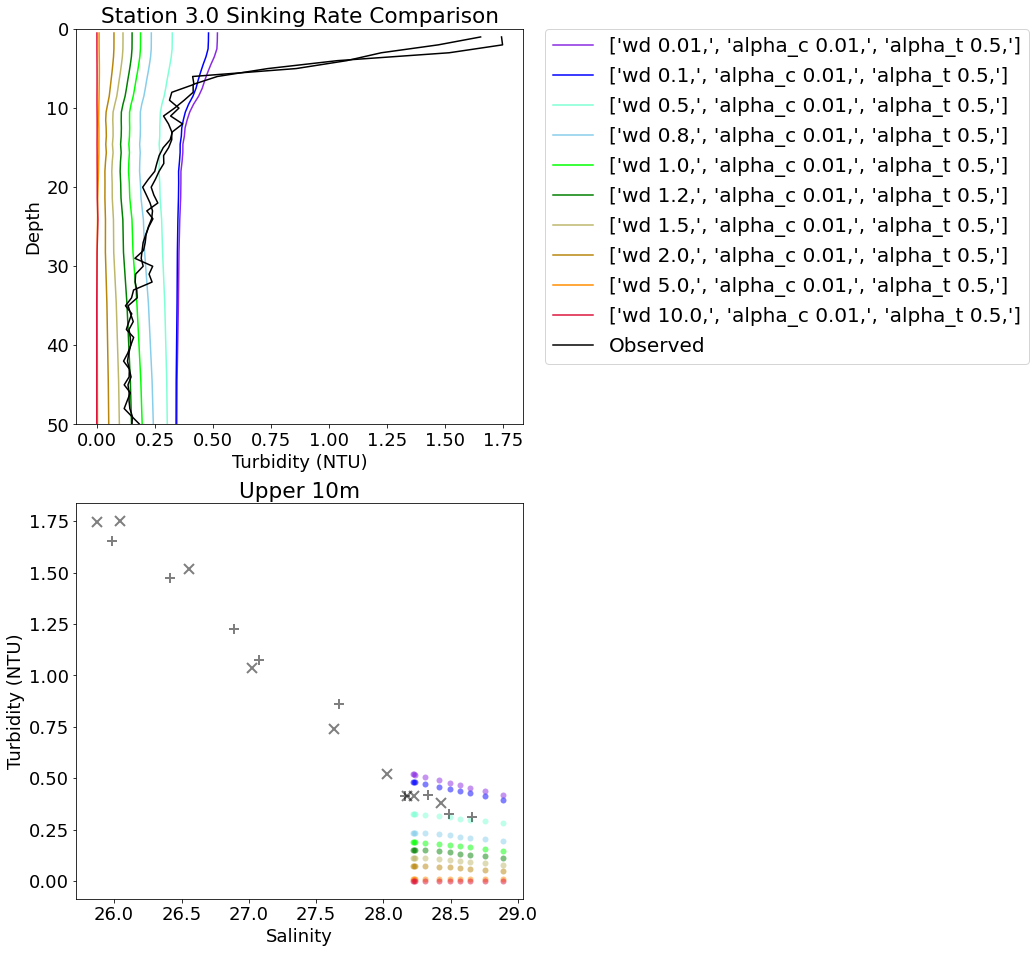

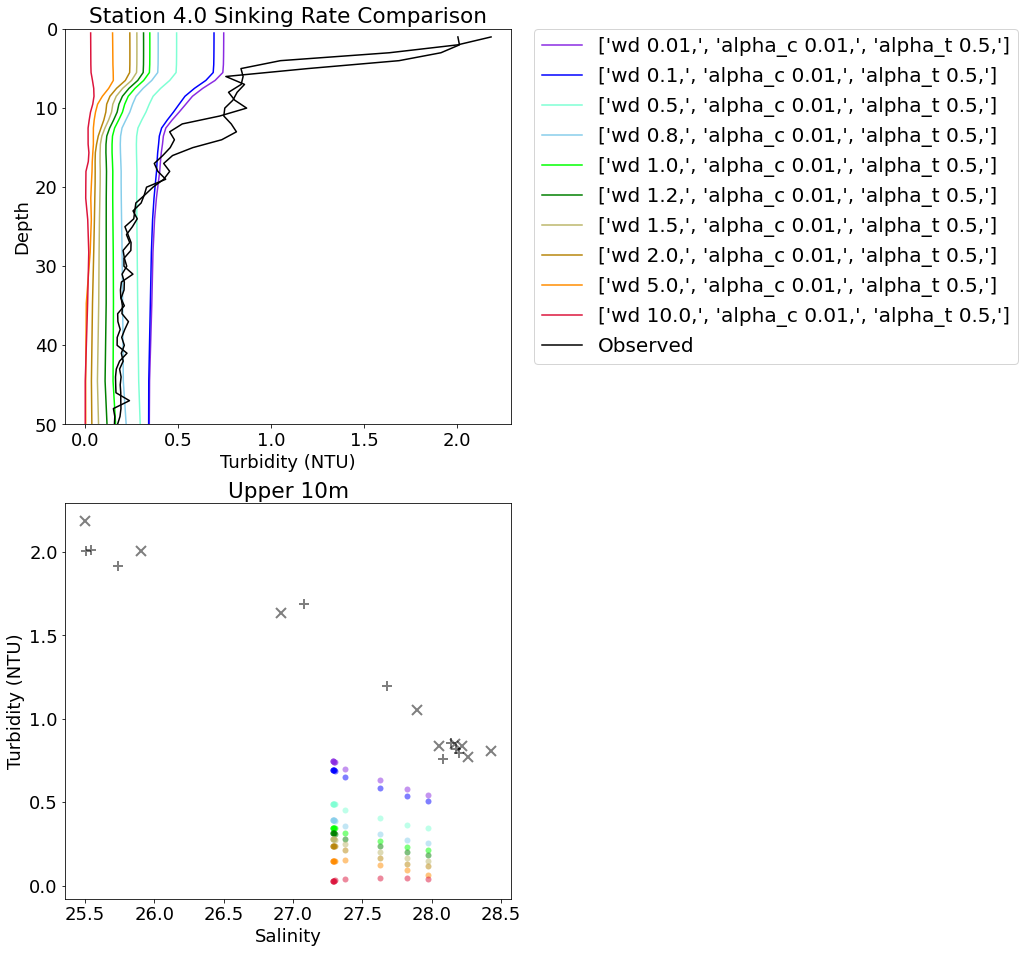

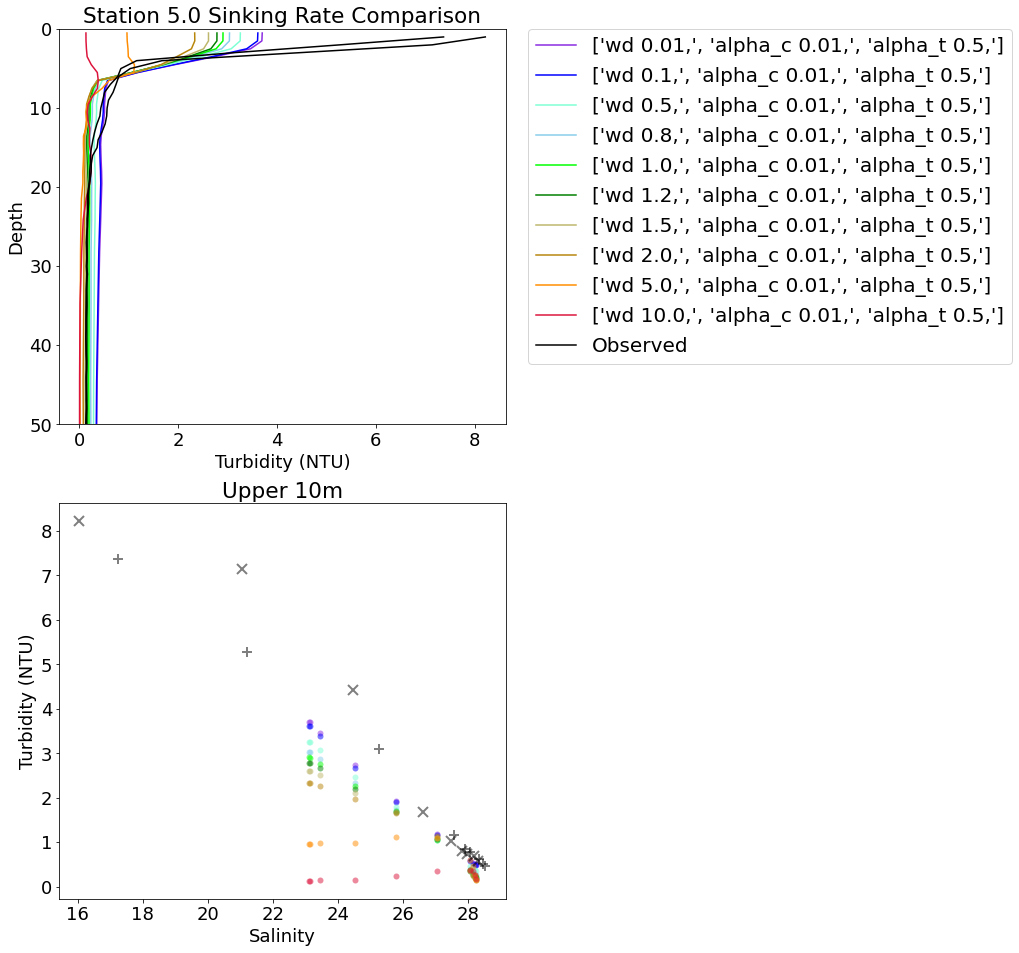

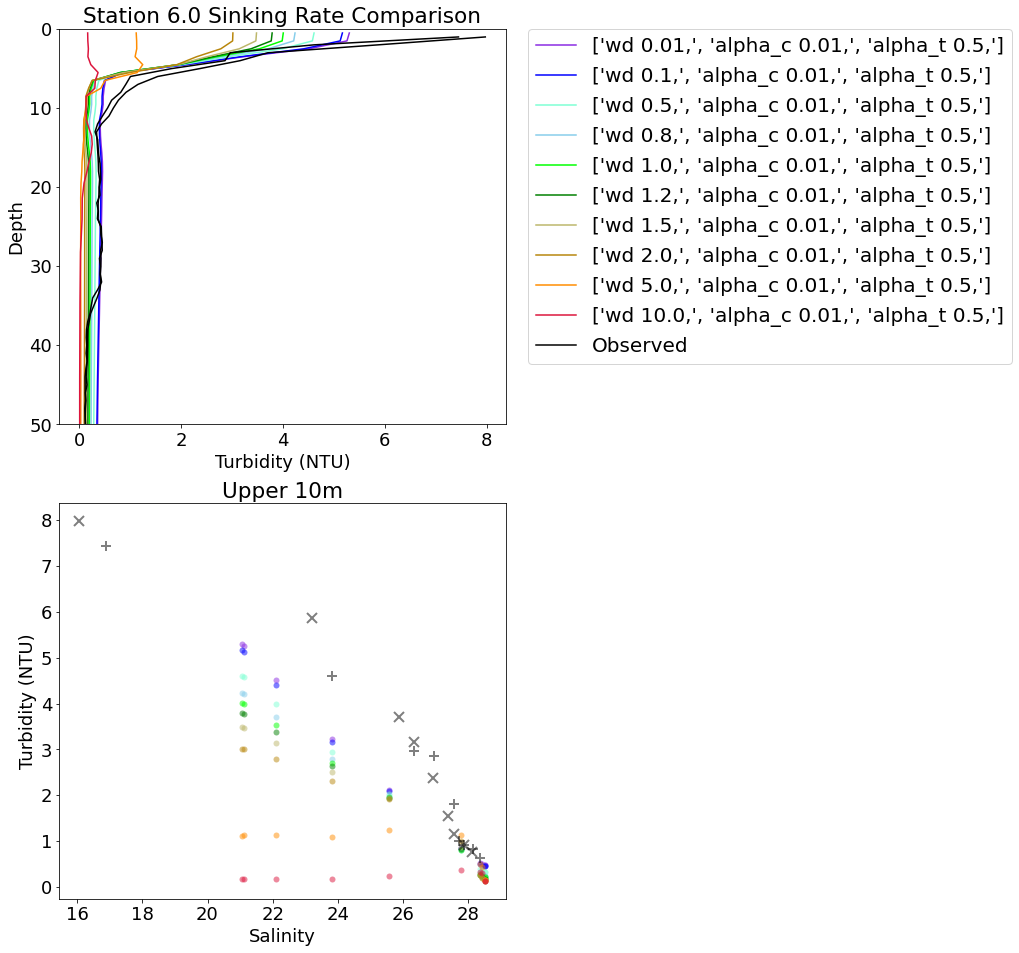

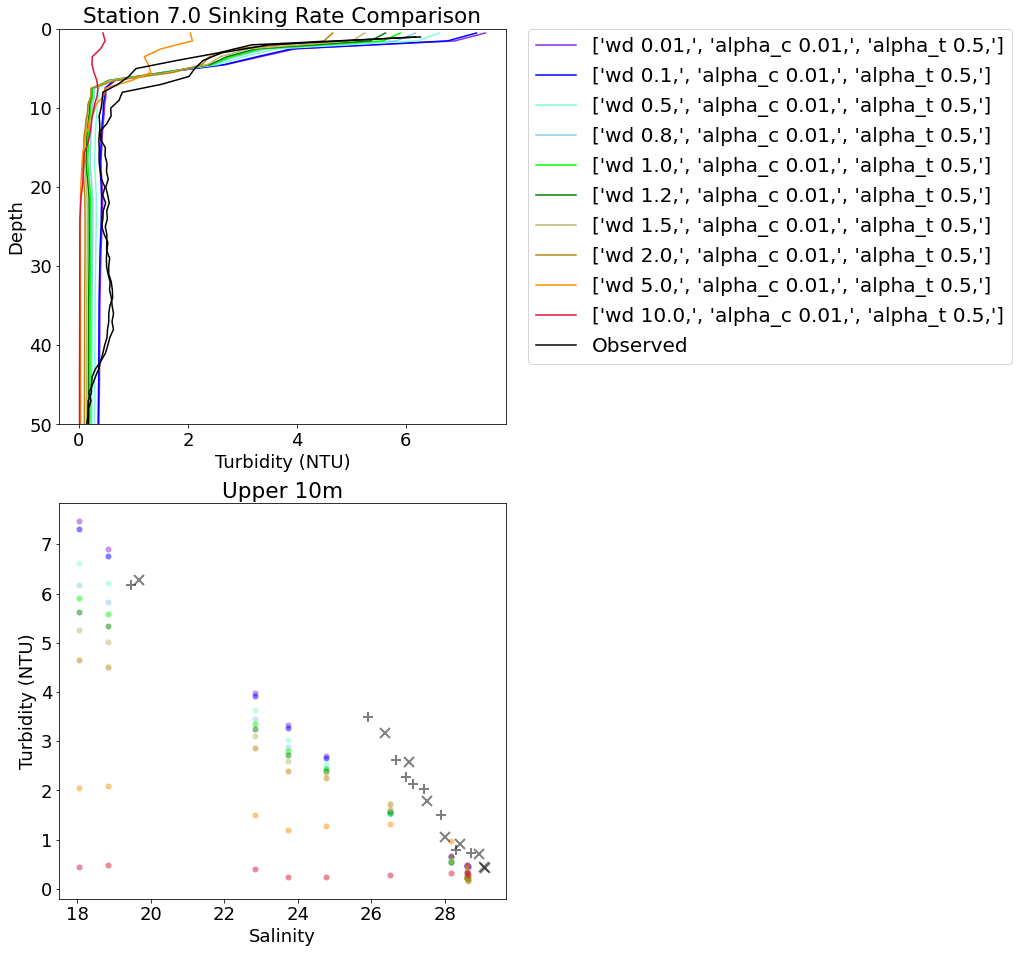

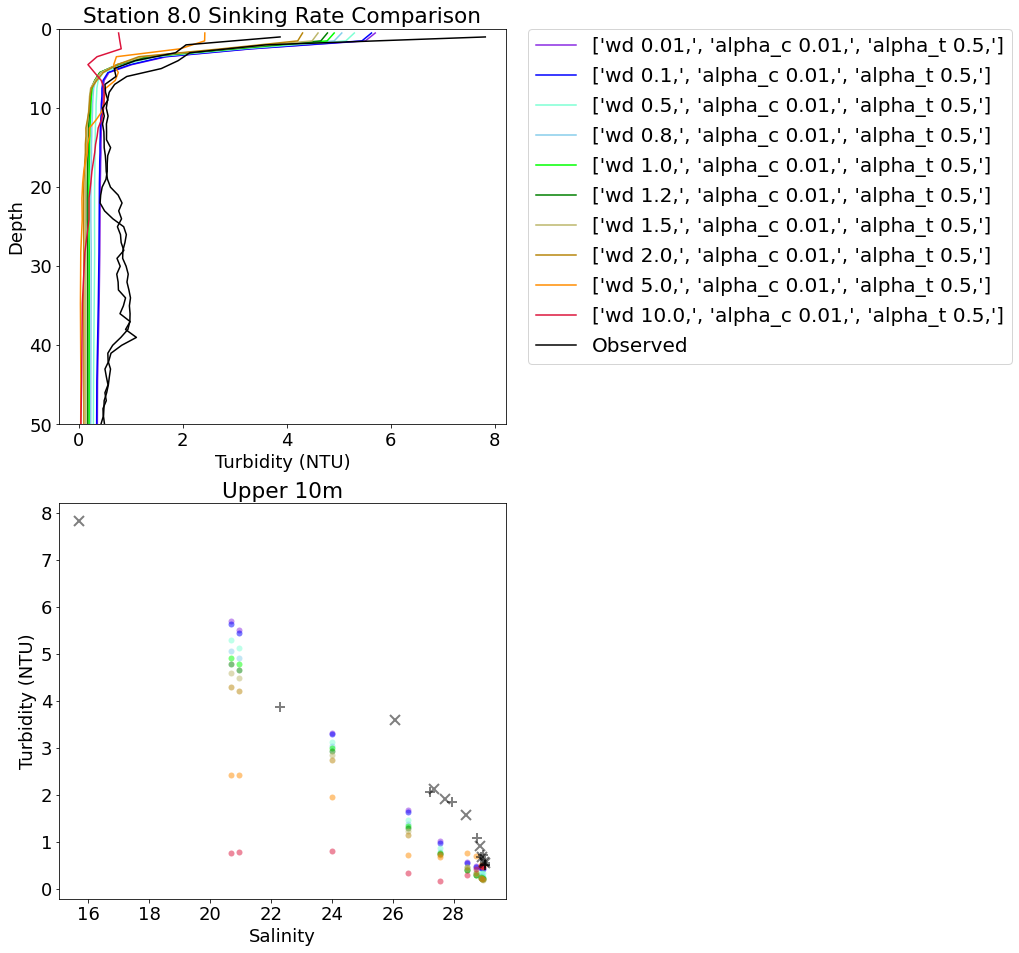

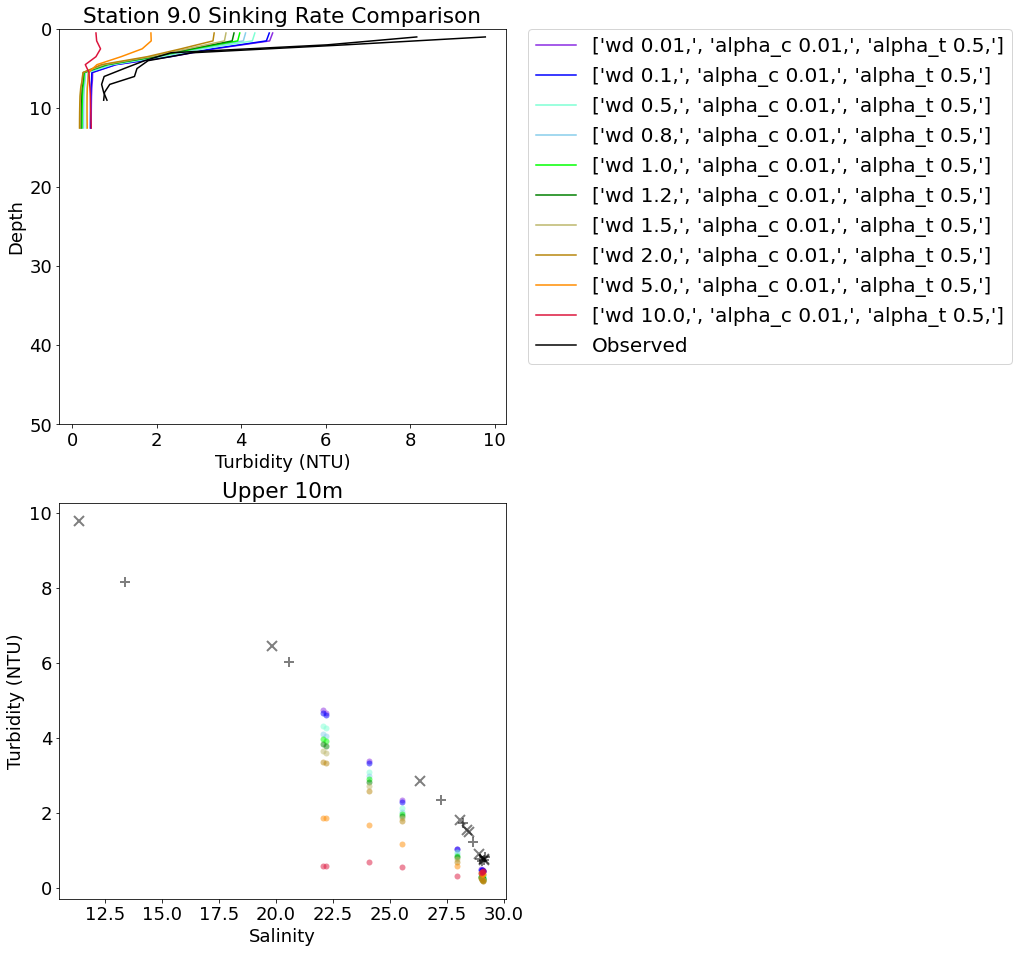

In [18]:
fig2,ax2=plt.subplots(1,1,figsize=(8,8))
for st in stas:
    plotProfs(f1,st,fig2,ax2,f1s,10)
for st in stas:
    plotProfs2(f1,st,fig2,ax2,f1s,10)
ax2.set_title('April 10, Upper 10m, Turbidity vs Salinity')
fig2.savefig('TvSApril10.png')

In [ ]:
fig2,ax2=plt.subplots(1,1,figsize=(8,8))
for st in stas:
    plotProfsMulti(f1,st,fig2,ax2,f1s,10)
for st in stas:
    plotProfs2(f1,st,fig2,ax2,f1s,10)

for st in stas:
    plotProfsMulti(f1,st)

In [ ]:
f1.close()
f1s.close()
rundir2='/data/eolson/MEOPAR/SS36runs/'+fileLoc+'/'+prefix+'_26may17'
f2=nc.Dataset(os.path.join(rundir2,'SalishSea_1h_20170526_20170604_ptrc_T.nc'))
f2s=nc.Dataset(os.path.join(rundir2,'SalishSea_1h_20170526_20170604_grid_T.nc'))
nml=f90nml.read(os.path.join(rundir2,'namelist_trace2_cfg'))

In [ ]:
stas2=df0.loc[df0['Date']==20170531]['Station'].values

In [ ]:
fig2,ax2=plt.subplots(1,1,figsize=(12,5))
for st in stas2:
    plotProfs(f2,st,fig2,ax2,f2s,10)
for st in stas2:
    plotProfs2(f2,st,fig2,ax2,f2s,10)

ax2.set_title('May 31, Upper 10m\n Turbidity vs Salinity')
ax2.set_position([.15,.15,.55,.7])
fig2.savefig('/home/eolson/pyCode/notebooks/figs/TvSMay31.png',dpi=150)

5/31/17 river buoy turbidity values: 37.95--70.09

In [ ]:
fig2,ax2=plt.subplots(1,1,figsize=(8,8))
for st in stas2:
    plotProfsMulti(f2,st,fig2,ax2,f2s,10)
for st in stas2:
    plotProfs2(f2,st,fig2,ax2,f2s,10)

In [ ]:
#ista=stas[0]
#f=f1
#def plotTT_SS:
#fig,[ax0,ax1]=plt.subplots(1,2,figsize=(12,4))
fig=plt.figure(figsize=(12,12))
ax0=plt.subplot2grid((3,2),(0,0))
ax1=plt.subplot2grid((3,2),(0,1))
ax3=plt.subplot2grid((3,2),(1,0),colspan=2)
ax4=plt.subplot2grid((3,2),(2,0),colspan=2)
f=f2
fs=f2s
iters=(('TUR1','blueviolet'),
       ('TUR2','blue'),
       ('TUR3','aquamarine'),
       ('TUR4','skyblue'),
       ('TUR5','lime'),
       ('TUR6','green'),
       ('TUR7','darkkhaki'),
       ('TUR8','darkgoldenrod'),
       ('TUR9','darkorange'),
       ('TUR10','crimson'))
vthresh=10
for ista in stas2:
# get model indices for time and location:
    dtfUTC=np.array([dateTimeToDecDay(dt.datetime(1900,1,1)+dt.timedelta(seconds=ii)) for ii in fs.variables['time_counter'][:]])
    date=str(df0.loc[df0['Station']==ista]['Date_UTC'].values[0])
    iyr=int(date[0:4])
    imon=int(date[4:6])
    iday=int(date[6:])
    itime=df0.loc[df0['Station']==ista]['Time_UTC_DecDay'].values[0]
    dtObsUTC=dateTimeToDecDay(dt.datetime(iyr,imon,iday)+dt.timedelta(days=itime))
    tt=np.argmin(np.abs(dtfUTC-dtObsUTC))
    lat=df0.loc[df0['Station']==ista]['LatDecDeg'].values[0]
    lon=df0.loc[df0['Station']==ista]['LonDecDeg'].values[0]
    jj,ii=find_closest_model_point(lon,lat,fs.variables['nav_lon'][:,:],fs.variables['nav_lat'][:,:])

    izC=zCasts[ista].uCast
    obsSal=izC['gsw_srA0'].loc[izC['prSM']<vthresh]
    obsT=izC['turb'].loc[izC['prSM']<vthresh]
    obsZ=izC['prSM'].loc[izC['prSM']<vthresh]
    if len(obsZ)==0:
        izC=zCasts[ista].dCast
        obsSal=izC['gsw_srA0'].loc[izC['prSM']<vthresh]
        obsT=izC['turb'].loc[izC['prSM']<vthresh]
        obsZ=izC['prSM'].loc[izC['prSM']<vthresh]
    
    ax3.plot(lon,fs.variables['vosaline'][tt,1,jj,ii]-np.interp([1.5],obsZ.values,obsSal),'k+')
    
    for lj in range(-1,2):
        for li in range(-1,2):
            iii=tmask[0,:,jj+lj,ii+li]==1
            if np.sum(iii)>0:
                p0=ax0.plot(obsSal,np.interp(obsZ.values,
                        fs.variables['deptht'][iii],fs.variables['vosaline'][tt,:,jj+lj,ii+li][iii]),'ko')
                    
    p=dict()
    count=0
    for (tvar,col) in iters:
        count+=1
        ax4.plot(lon,f.variables[tvar][tt,1,jj,ii]-np.interp([1.5],obsZ.values,obsT),'m.')
        for lj in range(-1,2):
            for li in range(-1,2):
                iii=tmask[0,:,jj+lj,ii+li]==1
                if np.sum(iii)>0:
                    p[count],=ax1.plot(obsT,np.interp(obsZ.values,
                            f1s.variables['deptht'][iii],f.variables[tvar][tt,:,jj+lj,ii+li][iii]),'o',color=col,
                              label=[x+' {},'.format(nml['nampisriv'][x][count-1]) for x in nml['nampisriv'].keys()])
ax0.set_xlabel('Observed')
ax0.set_ylabel('Model')
ax0.set_title('Salinity')
ax1.set_xlabel('Observed')
ax1.set_title('Turbidity (NTU)')
ax1.set_ylabel('Model')
#ax0.set_position([.1,.17,.33,.73])
#ax1.set_position([.55,.17,.33,.73])
ax1.set_xlim((0,70))
ax1.set_ylim((0,70))
ax3.set_xlabel('Lon')
ax3.set_ylabel('Model - Observed')
ax3.set_title('Salinity (black) Error vs Lon')
ax4.set_xlabel('Lon')
ax4.set_ylabel('Model - Observed')
ax4.set_title('Turbidity Error vs Lon')
fig.savefig('/home/eolson/pyCode/notebooks/figs/TandSMay31.png',dpi=150)